In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import f_oneway
from scipy.stats import bartlett
from sklearn.decomposition import PCA

In [2]:
data = np.array([
    [541572,4],
    [362945,1],
    [56329,0],
    [25675,1],
    [189189,5],
    [77575,7],
    [14986,4],
    [200410,5],
    [76163,2],
    [558540,8],
    [310499,3],
    [38416,2],
    [473388,0],
    [1130220,3],
    [407344,4],
    [321888,2],
    [437108,3],
    [520746,0],
    [294890,4],
    [1051920,1],
    [351936,2],
    [821060,3],
    [64698,6],
    [123524,8],
    [23188,8],
    [2661929,4],
    [1078581,0],
    [1744243,6],
    [538598,1],
    [665445,2],
    [12737452,1],
    [13144977,4],
    [4373190,0],
    [14491449,4],
    [78098,5],
    [26342,2],
    [34877,1],
    [167806,7],
    [24738,9]
])
df = pd.DataFrame(data, columns=['X', 'Y'])


In [3]:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df)


In [4]:
correlation_matrix = np.corrcoef(standardized_data.T)


In [5]:
print(correlation_matrix)


[[ 1.         -0.08910015]
 [-0.08910015  1.        ]]


In [6]:
# Обчислюємо кореляційну матрицю
correlation_matrix = df.corr()

In [7]:
# Створюємо одиничну матрицю з таких же розмірів, як кореляційна матриця
n = correlation_matrix.shape[0]
identity_matrix = np.identity(n)

In [8]:
# Порівнюємо кореляційну матрицю з одиничною матрицею
if np.array_equal(correlation_matrix.values, identity_matrix):
    print("Кореляційна матриця співпадає з одиничною матрицею.")
else:
    print("Кореляційна матриця відрізняється від одиничної матриці.")

Кореляційна матриця відрізняється від одиничної матриці.


In [9]:

# Створення об'єкту PCA з заданою кількістю головних компонент
n_components = 2 # кількість головних компонент
pca = PCA(n_components=n_components)

# Проведення аналізу головних компонент
pca.fit(df)

# Отримання проекцій об'єктів на головні компоненти
projected_data = pca.transform(df)
print("Проекції об'єктів на головні компоненти:")
print(projected_data)


Проекції об'єктів на головні компоненти:
[[-1.00309297e+06  5.51534790e-01]
 [-1.18171997e+06 -2.45983534e+00]
 [-1.48833597e+06 -3.47935236e+00]
 [-1.51898997e+06 -2.48130357e+00]
 [-1.35547597e+06  1.52910457e+00]
 [-1.46708997e+06  3.52200001e+00]
 [-1.52967897e+06  5.18016039e-01]
 [-1.34425497e+06  1.52981882e+00]
 [-1.46850197e+06 -1.47808986e+00]
 [-9.86124974e+05  4.55261485e+00]
 [-1.23416597e+06 -4.63173687e-01]
 [-1.50624897e+06 -1.48049257e+00]
 [-1.07127697e+06 -3.45280532e+00]
 [-4.14444974e+05 -4.10996029e-01]
 [-1.13732097e+06  5.42990782e-01]
 [-1.22277697e+06 -1.46244874e+00]
 [-1.10755697e+06 -4.55114651e-01]
 [-1.02391897e+06 -3.44979085e+00]
 [-1.24977497e+06  5.35832754e-01]
 [-4.92744974e+05 -2.41598005e+00]
 [-1.19272897e+06 -1.46053610e+00]
 [-7.23604974e+05 -4.30674975e-01]
 [-1.47996697e+06  2.52118035e+00]
 [-1.42114097e+06  4.52492480e+00]
 [-1.52147697e+06  4.51853812e+00]
 [ 1.11726403e+06  6.86501764e-01]
 [-4.66083974e+05 -3.41428300e+00]
 [ 1.99578026e

In [10]:
# Побудова матриці даних
data_matrix = np.dot(pca.components_, projected_data.T).T

# Побудова матриці рахунків
scores_matrix = projected_data

# Побудова матриці помилок
errors_matrix = df - data_matrix

# Побудова матриці навантажень
loadings_matrix = pca.components_.T * np.sqrt(pca.explained_variance_)

# Виведення матриць на екран
print("Матриця даних:")
print(data_matrix)
print("\nМатриця рахунків:")
print(scores_matrix)
print("\nМатриця помилок:")
print(errors_matrix)
print("\nМатриця навантажень:")
print(loadings_matrix)


Матриця даних:
[[-1.00309297e+06  4.87684965e-01]
 [-1.18171997e+06 -2.53505531e+00]
 [-1.48833597e+06 -3.57408933e+00]
 [-1.51898997e+06 -2.57799176e+00]
 [-1.35547597e+06  1.44282453e+00]
 [-1.46708997e+06  3.42861541e+00]
 [-1.52967897e+06  4.20647463e-01]
 [-1.34425497e+06  1.44425303e+00]
 [-1.46850197e+06 -1.57156434e+00]
 [-9.86124974e+05  4.48984509e+00]
 [-1.23416597e+06 -5.41731990e-01]
 [-1.50624897e+06 -1.57636976e+00]
 [-1.07127697e+06 -3.52099526e+00]
 [-4.14444974e+05 -4.37376674e-01]
 [-1.13732097e+06  4.70596949e-01]
 [-1.22277697e+06 -1.54028210e+00]
 [-1.10755697e+06 -5.25613918e-01]
 [-1.02391897e+06 -3.51496631e+00]
 [-1.24977497e+06  4.56280892e-01]
 [-4.92744974e+05 -2.44734473e+00]
 [-1.19272897e+06 -1.53645682e+00]
 [-7.23604974e+05 -4.76734564e-01]
 [-1.47996697e+06  2.42697609e+00]
 [-1.42114097e+06  4.43446499e+00]
 [-1.52147697e+06  4.42169163e+00]
 [ 1.11726403e+06  7.57618914e-01]
 [-4.66083974e+05 -3.44395062e+00]
 [ 1.99578026e+05  2.64079207e+00]
 [-1.

In [11]:
# Вибіркові дисперсії вихідних ознак
variances_original = np.var(df, axis=0)

# Вибіркові дисперсії проекцій об'єктів на головні компоненти
variances_projected = np.var(projected_data, axis=0)

# Виконання ANOVA тесту
statistic, p_value = f_oneway(*df.values.T, *projected_data.T)

# Виведення результатів
print("Вибіркові дисперсії вихідних ознак:", variances_original)
print("Вибіркові дисперсії проекцій об'єктів на головні компоненти:", variances_projected)
print("Статистика ANOVA:", statistic)
print("p-значення ANOVA:", p_value)


Вибіркові дисперсії вихідних ознак: X    1.252152e+13
Y    6.390533e+00
dtype: float64
Вибіркові дисперсії проекцій об'єктів на головні компоненти: [1.25215159e+13 6.33979915e+00]
Статистика ANOVA: 3.620467522496188
p-значення ANOVA: 0.014591532787422049


In [12]:
# Виконання тесту Бартлетта
statistic, p_value = bartlett(*df.values.T, *projected_data.T)

# Виведення результатів
print("Вибіркові дисперсії вихідних ознак:", variances_original)
print("Вибіркові дисперсії проекцій об'єктів на головні компоненти:", variances_projected)
print("Статистика тесту Бартлетта:", statistic)
print("p-значення тесту Бартлетта:", p_value)


Вибіркові дисперсії вихідних ознак: X    1.252152e+13
Y    6.390533e+00
dtype: float64
Вибіркові дисперсії проекцій об'єктів на головні компоненти: [1.25215159e+13 6.33979915e+00]
Статистика тесту Бартлетта: 2023.8309274783016
p-значення тесту Бартлетта: 0.0


In [13]:
#import numpy as np
#from sklearn.decomposition import PCA

# Загальні дані
#X = 1 # Вхідні дані (матриця ознак)

# Ініціалізуємо модель головних компонент
#pca = PCA()

# Виконуємо аналіз головних компонент
#pca.fit(X)

# Визначаємо відносну частку розкиду, що припадає на головні компоненти
#variance_ratio = pca.explained_variance_ratio_

# Побудова матриці коваріації для проекцій об'єктів на головні компоненти
#projected_data = pca.transform(X) # Отримуємо проекції об'єктів на головні компоненти
#covariance_matrix = np.cov(projected_data, rowvar=False) # Побудова матриці коваріації

# Виведення результатів
#print("Відносна частка розкиду, що припадає на головні компоненти:")
#print(variance_ratio)
#print("Матриця коваріації для проекцій об'єктів на головні компоненти:")
#print(covariance_matrix)


In [14]:
# Вхідні дані
data = np.array([
    [541572,4],
    [362945,1],
    [56329,0],
    [25675,1],
    [189189,5],
    [77575,7],
    [14986,4],
    [200410,5],
    [76163,2],
    [558540,8],
    [310499,3],
    [38416,2],
    [473388,0],
    [1130220,3],
    [407344,4],
    [321888,2],
    [437108,3],
    [520746,0],
    [294890,4],
    [1051920,1],
    [351936,2],
    [821060,3],
    [64698,6],
    [123524,8],
    [23188,8],
    [2661929,4],
    [1078581,0],
    [1744243,6],
    [538598,1],
    [665445,2],
    [12737452,1],
    [13144977,4],
    [4373190,0],
    [14491449,4],
    [78098,5],
    [26342,2],
    [34877,1],
    [167806,7],
    [24738,9]
])

# Ініціалізуємо модель головних компонент
pca = PCA()

# Виконуємо аналіз головних компонент
pca.fit(data)

# Визначаємо відносну частку розкиду, що припадає на головні компоненти
variance_ratio = pca.explained_variance_ratio_

# Побудова матриці коваріації для проекцій об'єктів на головні компоненти
projected_data = pca.transform(data) # Отримуємо проекції об'єктів на головні компоненти
covariance_matrix = np.cov(projected_data, rowvar=False) # Побудова матриці коваріації

# Виведення результатів
print("Відносна частка розкиду, що припадає на головні компоненти:")
print(variance_ratio)
print("Матриця коваріації для проекцій об'єктів на головні компоненти:")
print(covariance_matrix)


Відносна частка розкиду, що припадає на головні компоненти:
[1.00000000e+00 5.06312431e-13]
Матриця коваріації для проекцій об'єктів на головні компоненти:
[[ 1.28510294e+13 -4.41152799e-10]
 [-4.41152799e-10  6.50663597e+00]]


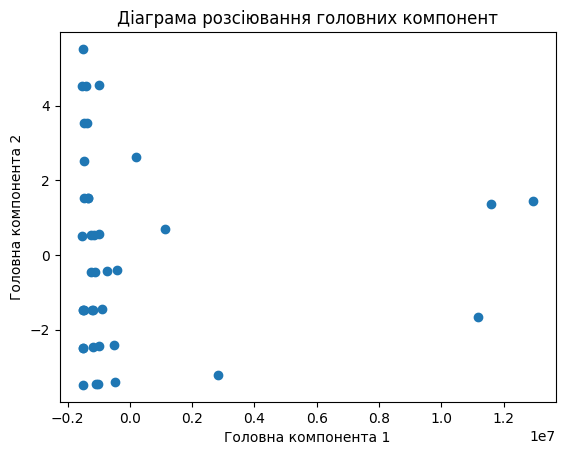

Інтерпретація перших двох головних компонент:
Головна компонента 1: Відсоток розкиду даних, що пояснюється головною компонентою 1: 100.00%
Головна компонента 2: Відсоток розкиду даних, що пояснюється головною компонентою 2: 0.00%


In [15]:
# Вхідні дані - введіть ваші дані тут
data = np.array([
    [541572,4],
    [362945,1],
    [56329,0],
    [25675,1],
    [189189,5],
    [77575,7],
    [14986,4],
    [200410,5],
    [76163,2],
    [558540,8],
    [310499,3],
    [38416,2],
    [473388,0],
    [1130220,3],
    [407344,4],
    [321888,2],
    [437108,3],
    [520746,0],
    [294890,4],
    [1051920,1],
    [351936,2],
    [821060,3],
    [64698,6],
    [123524,8],
    [23188,8],
    [2661929,4],
    [1078581,0],
    [1744243,6],
    [538598,1],
    [665445,2],
    [12737452,1],
    [13144977,4],
    [4373190,0],
    [14491449,4],
    [78098,5],
    [26342,2],
    [34877,1],
    [167806,7],
    [24738,9]
])

# Ініціалізуємо модель головних компонент
pca = PCA(n_components=2) # Вказуємо, що хочемо взяти лише перші дві головні компоненти

# Виконуємо аналіз головних компонент
pca.fit(data)

# Отримуємо проекції об'єктів на перші дві головні компоненти
projected_data = pca.transform(data)

# Отримуємо значення перших двох головних компонент
pc1 = projected_data[:, 0]
pc2 = projected_data[:, 1]

# Побудова діаграми розсіювання
plt.scatter(pc1, pc2)
plt.xlabel('Головна компонента 1')
plt.ylabel('Головна компонента 2')
plt.title('Діаграма розсіювання головних компонент')
plt.show()

# Інтерпретація перших двох головних компонент
print("Інтерпретація перших двох головних компонент:")
print("Головна компонента 1: Відсоток розкиду даних, що пояснюється головною компонентою 1: {:.2%}".format(pca.explained_variance_ratio_[0]))
print("Головна компонента 2: Відсоток розкиду даних, що пояснюється головною компонентою 2: {:.2%}".format(pca.explained_variance_ratio_[1]))
